In [47]:
#### Load multiple time series
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
fig1 = plt.figure(figsize=(2, 2), dpi=100)
%config InlineBackend.figure_format = 'retina'
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
# Import data
print("Reading in data...")
filepath = "C:/Users/fahmida/Desktop/Rental/Permanent Rental/By Times/Primary Rental Comparision(Apartment)/Summary By Room Type/1 Bed Toronto_cleaned.csv"
df= pd.read_csv(filepath, header=0, index_col=None)

#bytime = df.groupby("Time")
#bytime["Vacancy Rate (%)"].describe()
#bytime["Vacancy Rate (%)"].mean()

# Convert the date column to a datestamp type
df['Year'] = pd.to_datetime(df['Year'])

# Set the date column as the index of your DataFrame meat
df = df.set_index('Year')
print(df)
# Print the summary statistics of the DataFrame
print(df.describe())


Reading in data...
            Vacancy Rate (%)  Availability Rate (%)  Average Rent ($)  \
Year                                                                    
1990-10-01               0.8                    NaN               559   
1991-10-01               1.5                    NaN               592   
1992-10-01               1.9                    NaN               610   
1993-10-01               1.9                    NaN               627   
1994-10-01               1.3                    NaN               641   
1995-10-01               0.8                    NaN               661   
1996-10-01               1.0                    NaN               675   
1997-10-01               0.7                    NaN               685   
1998-10-01               0.8                    NaN               729   
1999-10-01               0.8                    NaN               770   
2000-10-01               0.6                    NaN               830   
2001-10-01               1.0    

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "

<Figure size 200x200 with 0 Axes>

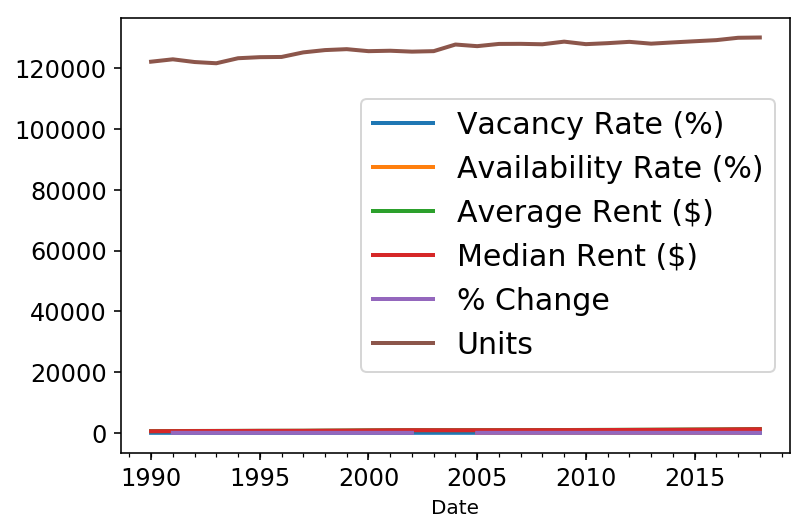

In [50]:
# Plot time series dataset
ax = df.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

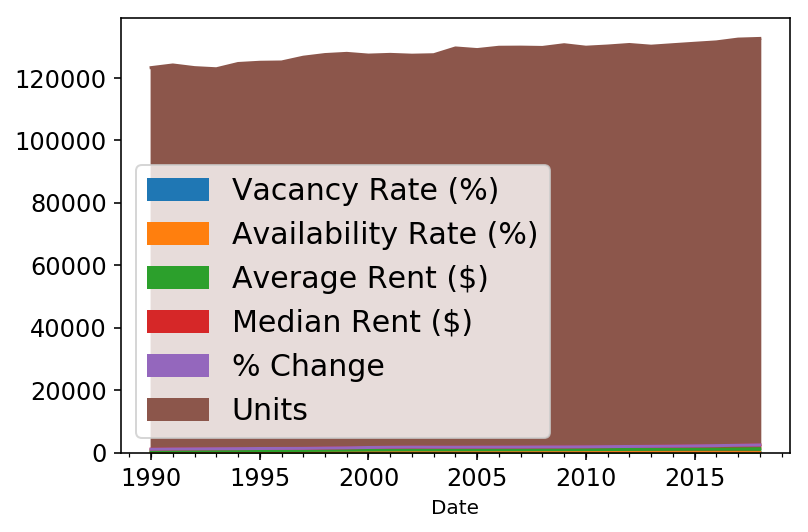

In [51]:
# Plot an area chart
ax = df.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

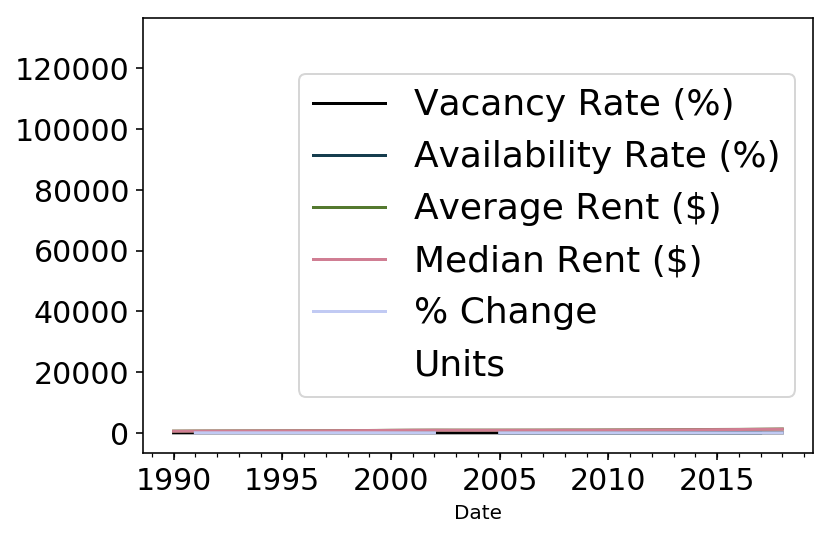

In [52]:
# Plot time series dataset using the cubehelix color palette
ax = df.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

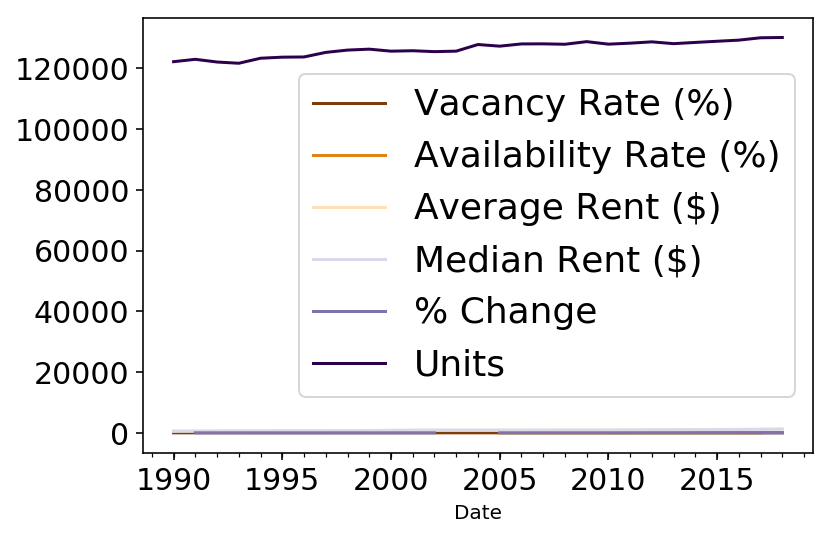

In [53]:
# Plot time series dataset using the PuOr color palette
ax = df.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

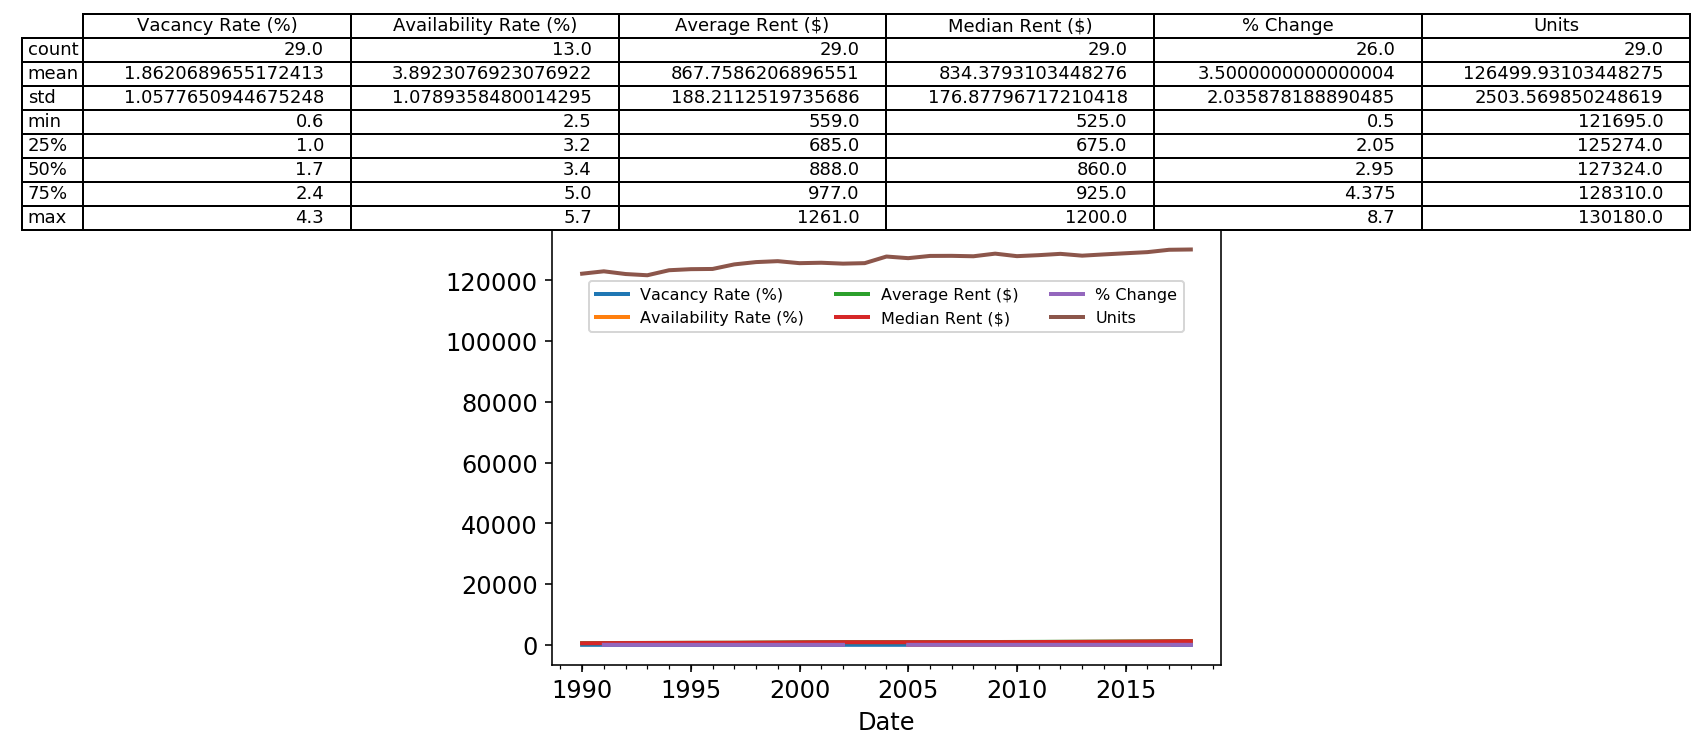

In [54]:
# Plot the meat data
df_summary=df.describe()
ax = df.plot(fontsize=12, linewidth=2)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=12)

# Add summary table information to the plot
ax.table(cellText=df_summary.values,
         colWidths = [.4]*len(df_summary.columns),
         rowLabels=df_summary.index,
         colLabels=df_summary.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, .9), ncol=3, fontsize=8)

# Show plot
plt.show()

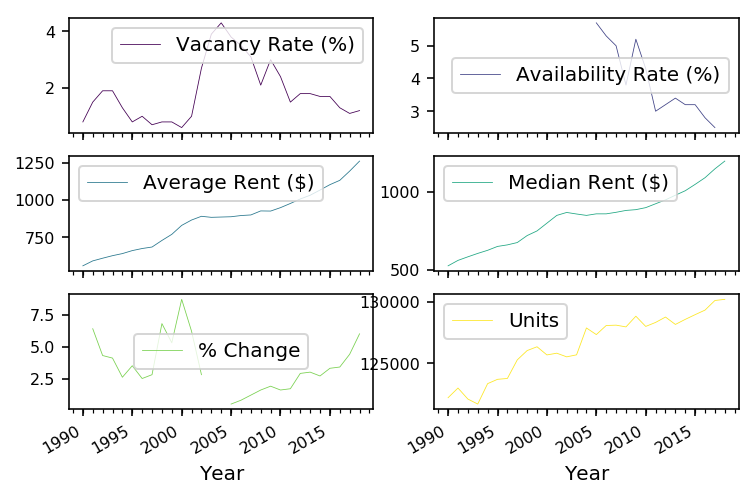

In [55]:
# Create a facetted graph with 2 rows and 3 columns
df.plot(subplots=True, 
          layout=(3, 2), 
          sharex=True, 
          sharey=False, 
          colormap='viridis', 
          fontsize=8, 
          legend=True, 
          linewidth=0.4)
          
plt.show()

In [42]:
# Print the correlation matrix between the vacancy Rate, availability rate
print(df[['Vacancy Rate (%)', 'Availability Rate (%)']].corr(method='pearson'))



                       Vacancy Rate (%)  Availability Rate (%)
Vacancy Rate (%)               1.000000               0.991216
Availability Rate (%)          0.991216               1.000000


In [46]:
# Print the correlation matrix between the average rent, median rent using the pearson method
print(df[['Average Rent ($)', 'Median Rent ($)']].corr(method='pearson'))


                  Average Rent ($)  Median Rent ($)
Average Rent ($)          1.000000         0.998303
Median Rent ($)           0.998303         1.000000


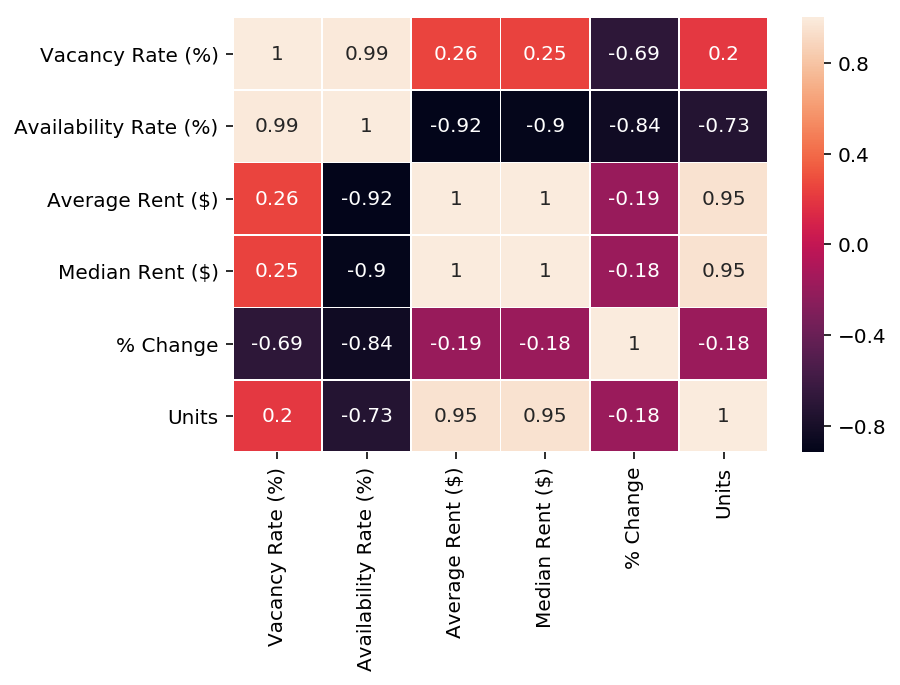

In [56]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_df = df.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_df,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

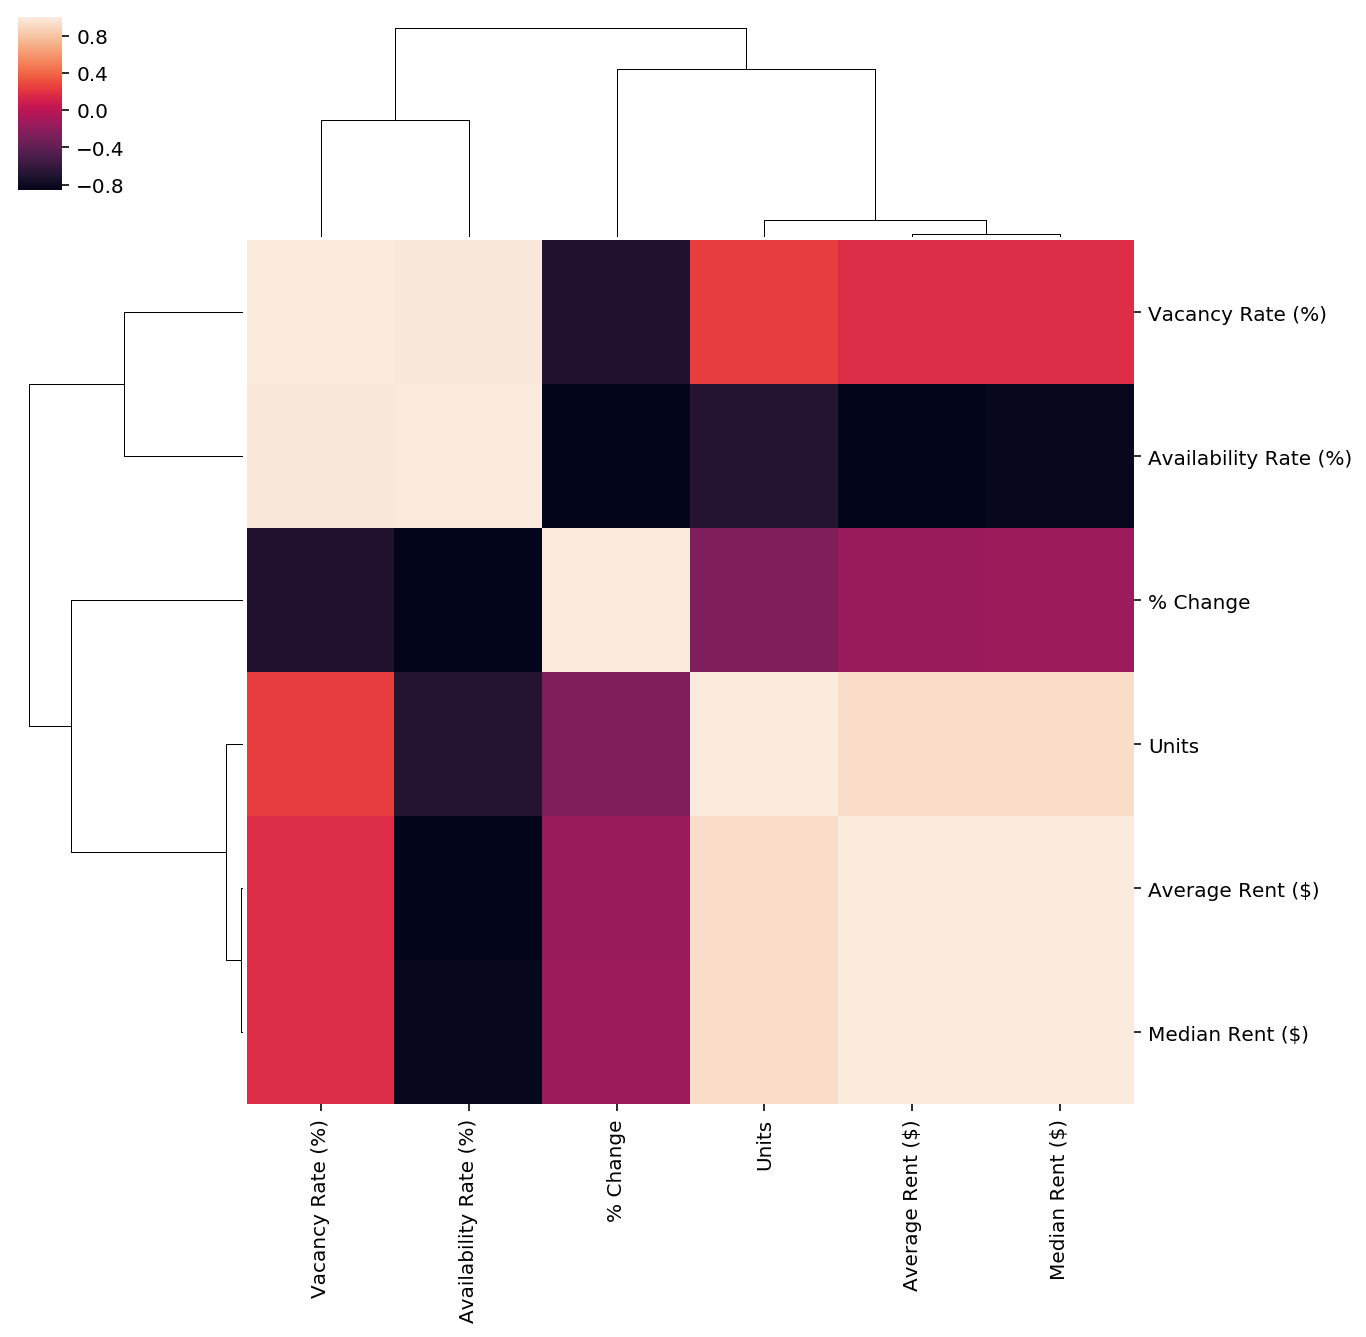

In [58]:
# Clustered heatmaps
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the DataFrame
corr_df = df.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [60]:
### a project on 1 bedroom

# Check the type of each column in your DataFrame
print(df.dtypes)

# Check the number of missing values in each column
print(df.isnull().sum())

Vacancy Rate (%)         float64
Availability Rate (%)    float64
Average Rent ($)           int64
Median Rent ($)            int64
% Change                 float64
Units                      int64
dtype: object
Vacancy Rate (%)          0
Availability Rate (%)    16
Average Rent ($)          0
Median Rent ($)           0
% Change                  3
Units                     0
dtype: int64


       Vacancy Rate (%)  Availability Rate (%)  Average Rent ($)  \
count         29.000000              13.000000         29.000000   
mean           1.862069               3.892308        867.758621   
std            1.057765               1.078936        188.211252   
min            0.600000               2.500000        559.000000   
25%            1.000000               3.200000        685.000000   
50%            1.700000               3.400000        888.000000   
75%            2.400000               5.000000        977.000000   
max            4.300000               5.700000       1261.000000   

       Median Rent ($)   % Change          Units  
count        29.000000  26.000000      29.000000  
mean        834.379310   3.500000  126499.931034  
std         176.877967   2.035878    2503.569850  
min         525.000000   0.500000  121695.000000  
25%         675.000000   2.050000  125274.000000  
50%         860.000000   2.950000  127324.000000  
75%         925.000000   4.375

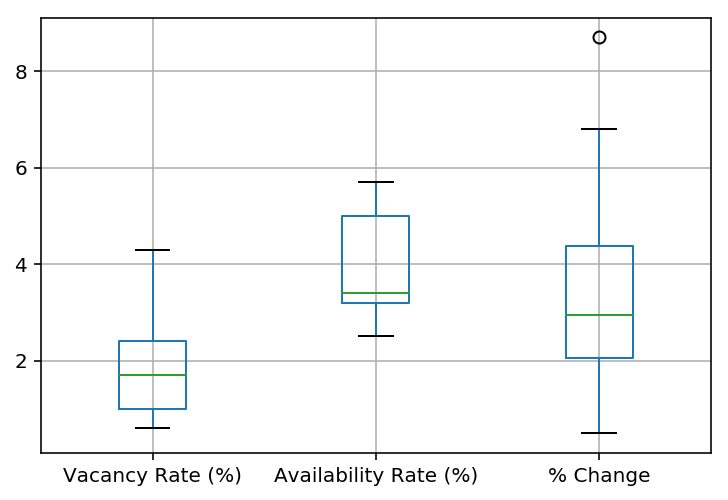

In [74]:
# Generate numerical summaries
print(df.describe())
# Generate a boxplot
df1 = df.drop(["Units", "Average Rent ($)", "Median Rent ($)"], axis=1)
df1.boxplot(fontsize=10, vert=True)
plt.show()

## change data type:: data['Item Code'].astype(str)





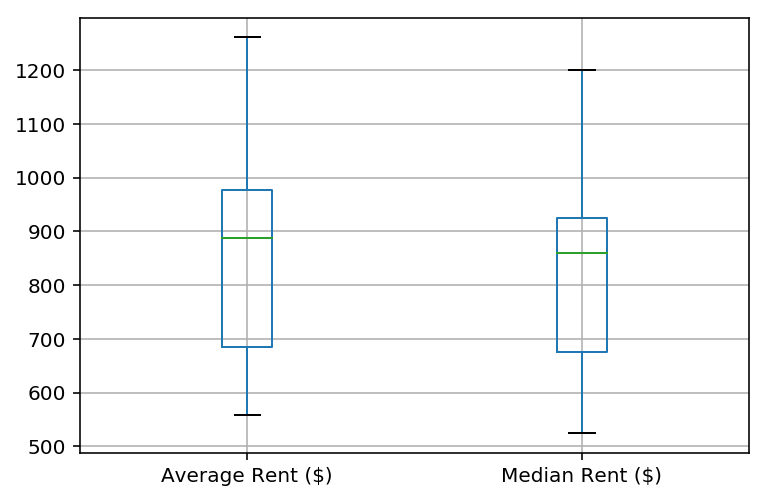

In [75]:
df2 = df.drop(["Vacancy Rate (%)", "Availability Rate (%)", "% Change", "Units"], axis=1)
df2.boxplot(fontsize=10, vert=True)
plt.show()

